# Livneh and WRF California, Oregon, Washington Region Average

In [1]:
# imports
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import geopandas as gpd
import earthpy as et
import xarray as xr
# Spatial subsetting of netcdf files
import regionmask


# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")

Livneh Averages

In [2]:
# reading in livneh
fn = '/cw3e/mead/projects/cwp103/scratch/ldehaan/Livneh/ptt_2017.nc'
liv = xr.open_dataset(fn)
liv_tm = liv['Tmax'][36:47]

In [3]:
# Download natural earth data which contains state boundaries to generate AOI
#et.data.get_data(
    #url="https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_1_states_provinces_lakes.zip")

states_path = "ne_50m_admin_1_states_provinces_lakes.shp"

states_gdf = gpd.read_file(states_path)
states_gdf.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry
0,Admin-1 scale rank,2,AUS-2651,2651,AU-WA,None,AU,6,Western Australia,None,...,West-Australië,Australia Zachodnia,Austrália Ocidental,Западная Австралия,Western Australia,Batı Avustralya,Tây Úc,西澳大利亚州,1159315805,"MULTIPOLYGON (((113.13181 -25.95199, 113.14823..."
1,Admin-1 scale rank,2,AUS-2650,2650,AU-NT,None,AU,6,Northern Territory,None,...,Noordelijk Territorium,Terytorium Północne,Território do Norte,Северная территория,Northern Territory,Kuzey Toprakları,Lãnh thổ Bắc Úc,北領地,1159315809,"MULTIPOLYGON (((129.00196 -25.99901, 129.00196..."
2,Admin-1 scale rank,2,AUS-2655,2655,AU-SA,None,AU,3,South Australia,None,...,Zuid-Australië,Australia Południowa,Austrália Meridional,Южная Австралия,South Australia,Güney Avustralya,Nam Úc,南澳大利亚州,1159313267,"MULTIPOLYGON (((129.00196 -31.69266, 129.00196..."
3,Admin-1 scale rank,2,AUS-2657,2657,AU-QLD,None,AU,5,Queensland,None,...,Queensland,Queensland,Queensland,Квинсленд,Queensland,Queensland,Queensland,昆士蘭州,1159315807,"MULTIPOLYGON (((138.00196 -25.99901, 138.00174..."
4,Admin-1 scale rank,2,AUS-2660,2660,AU-TAS,None,AU,5,Tasmania,None,...,Tasmanië,Tasmania,Tasmânia,Тасмания,Tasmanien,Tasmanya,Tasmania,塔斯馬尼亞州,1159313261,"MULTIPOLYGON (((147.31246 -43.28038, 147.34238..."


In [4]:
# You will use the bounds to determine the slice values for this data
# Select any state in the CONUS that you wish here! California is the default
cali_aoi = states_gdf[states_gdf.name == "California"]
or_aoi = states_gdf[states_gdf.name == "Oregon"]
wa_aoi = states_gdf[states_gdf.name == "Washington"]

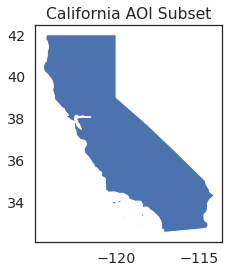

In [5]:
# This is the AOI of interest. You only want to calculate summary values for
# pixels within this AOI rather the entire rectangular spatial extent.
f, ax = plt.subplots()
cali_aoi.plot(ax=ax)
ax.set(title="California AOI Subset")

plt.show()

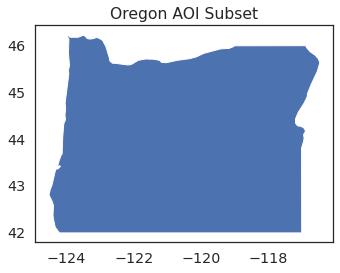

In [6]:
# This is the AOI of interest. You only want to calculate summary values for
# pixels within this AOI rather the entire rectangular spatial extent.
f, ax = plt.subplots()
or_aoi.plot(ax=ax)
ax.set(title="Oregon AOI Subset")

plt.show()

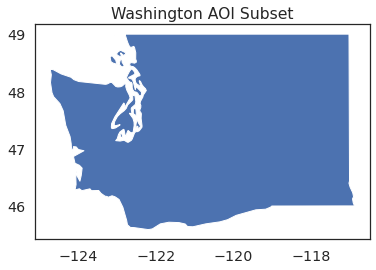

In [7]:
# This is the AOI of interest. You only want to calculate summary values for
# pixels within this AOI rather the entire rectangular spatial extent.
f, ax = plt.subplots()
wa_aoi.plot(ax=ax)
ax.set(title="Washington AOI Subset")

plt.show()

In [8]:
# Create a 3d mask - this contains the true / false values identifying pixels
# inside vs outside of the mask region
cali_mask = regionmask.mask_3D_geopandas(cali_aoi, liv.lon, liv.lat)
or_mask = regionmask.mask_3D_geopandas(or_aoi, liv.lon, liv.lat)
wa_mask = regionmask.mask_3D_geopandas(wa_aoi, liv.lon, liv.lat)

In [9]:
# Apply the mask for California to the data (comment out one individually so kernel won't crash, do not run together)
liv_ca = liv.where(cali_mask)
#liv_or = liv.where(or_mask)
#liv_wa = liv.where(wa_mask)

In [10]:
# plotting masking for reference
#liv_wa['Tmax'][35:37].plot(col='Time',col_wrap=1,figsize=(10, 10))
#plt.show()

# averaging
def avg(area_arr):
    sum_arr = area_arr['Tmax'][35].data
    for i in np.arange(36, 46):
        sum_arr += area_arr['Tmax'][i].data
    avg = sum_arr / 11
    return avg

#ca_avg = avg(liv_ca)
#or_avg = avg(liv_or)
wa_avg = avg(liv_wa)

#total_avg = sum(ca_avg, or_avg, wa_avg)
total_avg = wa_avg

In [11]:
# averaging
def avg(area_arr):
    sum_arr = area_arr['Tmax'][36].data
    for i in np.arange(37, 47):
        sum_arr += area_arr['Tmax'][i].data
    avg = sum_arr / 11
    return avg

ca_avg = avg(liv_ca)
#or_avg = avg(liv_or)
#wa_avg = avg(liv_wa)

#total_avg = sum(ca_avg, or_avg, wa_avg)
total_avg = ca_avg

In [12]:
# convert dif_arr to masked array to overlook NaNs
import numpy.ma as ma
m_out = ma.masked_invalid(total_avg)

In [13]:
# numerical avg stat over entire region
np.mean(m_out.flatten()), min(np.unique(m_out)), max(np.unique(m_out))
# CA: 14.835153130347974 (no shift), 15.161519240825251 (shift)
# OR: 6.695459310620824, 6.899857756820713
# WA: 1.7248288251415276, 2.15174068376991
# average of region
#np.average([14.835153130347974,6.695459310620824,1.7248288251415276])
np.average([15.161519240825251, 6.899857756820713, 2.15174068376991])

8.071039227138625

WRF Average

# reading in wrf tmaxes
wrf_05a = xr.open_dataset('./wrf_05.nc')
wrf_06a = xr.open_dataset('./wrf_06.nc')
wrf_07a = xr.open_dataset('./wrf_07.nc')
wrf_08a = xr.open_dataset('./wrf_08.nc')
wrf_09a = xr.open_dataset('./wrf_09.nc')
wrf_10a = xr.open_dataset('./wrf_10.nc')
wrf_11a = xr.open_dataset('./wrf_11.nc')
wrf_12a = xr.open_dataset('./wrf_12.nc')
wrf_13a = xr.open_dataset('./wrf_13.nc')
wrf_14a = xr.open_dataset('./wrf_14.nc')
wrf_15a = xr.open_dataset('./wrf_15.nc')
wrf_lsta = [wrf_05a, wrf_06a, wrf_07a, wrf_08a, wrf_09a, wrf_10a, wrf_11a, wrf_12a, wrf_13a, wrf_14a, wrf_15a]

In [14]:
# reading in wrf tmaxes shifted
wrf_06a1 = xr.open_dataset('./wrf_06_prev-Copy1.nc')
wrf_07a1 = xr.open_dataset('./wrf_07_prev-Copy1.nc')
wrf_08a1 = xr.open_dataset('./wrf_08_prev-Copy1.nc')
wrf_09a1 = xr.open_dataset('./wrf_09_prev-Copy1.nc')
wrf_10a1 = xr.open_dataset('./wrf_10_prev-Copy1.nc')
wrf_11a1 = xr.open_dataset('./wrf_11_prev-Copy1.nc')
wrf_12a1 = xr.open_dataset('./wrf_12_prev-Copy1.nc')
wrf_13a1 = xr.open_dataset('./wrf_13_prev-Copy1.nc')
wrf_14a1 = xr.open_dataset('./wrf_14_prev-Copy1.nc')
wrf_15a1 = xr.open_dataset('./wrf_15_prev-Copy1.nc')
wrf_16a1 = xr.open_dataset('./wrf_16_prev-Copy1.nc')
wrf_lsta = [wrf_06a1, wrf_07a1, wrf_08a1, wrf_09a1, wrf_10a1, wrf_11a1, wrf_12a1, wrf_13a1, wrf_14a1, wrf_15a1, wrf_16a1]

In [15]:
# Apply the mask for California to the data (input different masks to find wrf respective averages)
wrf_lst = []
for i in wrf_lsta:
    temp = i.where(wa_mask)
    wrf_lst.append(temp)

In [16]:
# averaging
sum_arr1 = wrf_lst[0]['maxes'].data
for i in wrf_lst[1:12]:
    sum_arr1 += i['maxes'].data
avg1 = sum_arr1 / 11

# change 0.0 to NaNs
avg1[avg1 == 0.0] = 'nan'

In [17]:
# convert dif_arr to masked array to overlook NaNs
import numpy.ma as ma
m_out1 = ma.masked_invalid(avg1)

# convert from K to C
m_out1 = m_out1 - 273.15

In [18]:
# numerical average over entire region
np.mean(m_out1.flatten())
# CA: 13.727664636849648, (shifted is same for all)
# OR: 6.32100706598035, 
# WA: 3.027402841024625, 
#np.mean([13.727664636849648,6.32100706598035,3.027402841024625])

3.027402841024625

fin.